# **MACHINE LEARNING CON PYTHON - PROYECTO FINAL**

### **Estudiante:** *Emerson Maximo Asto Rodriguez*

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Importar librerías](#section11)
    * [2.1. Cargar el dataset](#section12)
* [2. Estadística descriptiva](#section2)
    * [2.1. Dimensiones del dataset](#section21)
    * [2.2. Visualización de datos](#section22)
    * [2.3. Resumen estadístico](#section23)
    * [2.4. Tipo de datos](#section24)
    * [2.5. Correlación entre atributos](#section25)
    * [2.6. Valores NaN](#section26)
* [3. Visualización del dataset](#section3)
    * [3.1. Gráficos Univariado](#section31)
    * [3.2. Gráficos multivariados](#section32)
    * [3.3. Resumen de ideas](#section33)
* [4. Fase de modelado](#section4)
    * [4.1. Crear conjunto de validación](#section41)
    * [4.2. Evaluación de línea base](#section42)
    * [4.3. Evaluar modelos: estandarización](#section43)
* [5. Fase de Optimización](#section5)
    * [5.1. Optimización de k-NN](#section51)
* [6. Agoritmos ensamblados](#section6)
    * [6.1. Comparar algoritmos ensamblados](#section61)
    * [6.2. Fase de optimización GBM](#section62)
* [7. Fase de forecasting](#section7)

In [ ]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

---

<a id="section1"></a>
# <font color="#55CCAF"> 1. Introducción</font>


**BASE DE DATOS ELEGIDA:**

`Concrete Compressive Strength`
Descargado de UCI, disponible en: [Base de datos en excel](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength)

**Descripción:**

>*El hormigón es el material más importante en la ingeniería civil. los
La resistencia a la compresión del hormigón es una función altamente no lineal de la edad e ingredientes. Estos ingredientes incluyen cemento, escoria de alto horno, cenizas volantes, agua, superplastificante, agregado grueso y agregado fino.*

Los atributos son:

* Cement -- kg in a m3 mixture
* Blast Furnace Slag (component 2) -- kg in a m3 mixture
* Fly Ash (component 3) -- kg in a m3 mixture
*  Water (component 4) -- kg in a m3 mixture
* Superplasticizer -- kg in a m3 mixture
* Coarse Aggregate -- kg in a m3 mixture
* Fine Aggregate -- kg in a m3 mixture
* Age -- Day (1~365)

El target es:

* Concrete compressive strength -- MPa

Es un problema de regresión


<a id="section11"></a>
## <font color="#55CCAF"> 1.1. Importar librerías</font>

In [ ]:
# Load libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import pickle as pkl

import warnings
warnings.filterwarnings('ignore')

<a id="section12"></a>
## <font color="#55CCAF"> 1.2. Cargar el dataset</font>
*La base de datos se encuentra en formato xls y tiene encabezados en la fila 0, los cuales se reemplazará con abreciaciones cortas*

In [ ]:
names = ["Cem", "BFS", "FAh", "Wat", "Sp", "CA", "FAe", "Age", "CCS"]
data = pd.read_excel("Concrete_Data.xls", header=0, names=names)

<a id="section2"></a>
# <font color="#55CCAF"> 2. Estadística descriptiva</font>

Se procederá a visualizar los datos de los siguientes modos:
* Dimensiones del conjunto de datos.
* Visualización de datos.
* Resumen estadístico de todos los atributos.
* Coorelación de atributos numéricos.
* Tipo de atributos.

<a id="section21"></a>
## <font color="#55CCAF"> 2.1. Dimensiones del conjunto de datos</font>

>Podemos tener una idea rápida de cuántas instancias (filas) y cuántos atributos (columnas) hay en nuestro conjunto de datos con la propiedad `shape`.

In [ ]:
data.shape

(1030, 9)

>Podemos ver que tenemos 1030 instancias y 9 atributos incluyendo el target.

<a id="section22"></a>
## <font color="#55CCAF"> 2.2. Visualización de datos</font>

>Visualizamos las 5 primeras filas con la funcion `head`

In [ ]:
data.head()

,Cem,BFS,FAh,Wat,Sp,CA,FAe,Age,CCS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


>Podemos observar que todas los atributos incluido el target son valores reales, no hay datos categoricos.

<a id="section23"></a>
## <font color="#55CCAF"> 2.3. Resumen estadístico</font>

In [ ]:
pd.set_option("display.width",500)
pd.set_option("precision", 2)

data.describe()

,Cem,BFS,FAh,Wat,Sp,CA,FAe,Age,CCS
count,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00
mean,281.17,73.90,54.19,181.57,6.20,972.92,773.58,45.66,35.82
std,104.51,86.28,64.00,21.36,5.97,77.75,80.18,63.17,16.71
min,102.00,0.00,0.00,121.75,0.00,801.00,594.00,1.00,2.33
25%,192.38,0.00,0.00,164.90,0.00,932.00,730.95,7.00,23.71
50%,272.90,22.00,0.00,185.00,6.35,968.00,779.51,28.00,34.44
75%,350.00,142.95,118.27,192.00,10.16,1029.40,824.00,56.00,46.14
max,540.00,359.40,200.10,247.00,32.20,1145.00,992.60,365.00,82.60


>Se puede observar a partir de las medias que las escalas de los atributos son diferentes, esto significa que se debe aplicar alguna transformación como esclamiento, normalización y/o estandarización para evitar que se de mas importancia a las con valores mas grandes. De las desviaciones estandar y percentiles se puede notar algunos sesgos de los atributos por lo que se puede aplicar alguna transformacion para corregir dichos sesgos.

<a id="section24"></a>
## <font color="#55CCAF"> 2.4. Tipo de datos</font>

>Podemos ver el tipo de variable de cada atributo con la propiedad `dtypes`.

In [ ]:
data.dtypes

Cem    float64
BFS    float64
FAh    float64
Wat    float64
Sp     float64
CA     float64
FAe    float64
Age      int64
CCS    float64
dtype: object

> Se aprecia que todos los atributos son numericos. Solo Age es de tipo entero el resto son flotantes.

<a id="section25"></a>
## <font color="#55CCAF"> 2.5. Correlación entre atributos</font>

>Analizamos la correlacion entre atributos con el metodo `corr`

In [ ]:
pd.set_option('precision', 2)
print(data.corr(method='pearson'))

      Cem   BFS       FAh   Wat    Sp        CA   FAe       Age   CCS
Cem  1.00 -0.28 -3.97e-01 -0.08  0.09 -1.09e-01 -0.22  8.19e-02  0.50
BFS -0.28  1.00 -3.24e-01  0.11  0.04 -2.84e-01 -0.28 -4.42e-02  0.13
FAh -0.40 -0.32  1.00e+00 -0.26  0.38 -9.98e-03  0.08 -1.54e-01 -0.11
Wat -0.08  0.11 -2.57e-01  1.00 -0.66 -1.82e-01 -0.45  2.78e-01 -0.29
Sp   0.09  0.04  3.77e-01 -0.66  1.00 -2.66e-01  0.22 -1.93e-01  0.37
CA  -0.11 -0.28 -9.98e-03 -0.18 -0.27  1.00e+00 -0.18 -3.02e-03 -0.16
FAe -0.22 -0.28  7.91e-02 -0.45  0.22 -1.79e-01  1.00 -1.56e-01 -0.17
Age  0.08 -0.04 -1.54e-01  0.28 -0.19 -3.02e-03 -0.16  1.00e+00  0.33
CCS  0.50  0.13 -1.06e-01 -0.29  0.37 -1.65e-01 -0.17  3.29e-01  1.00


>Se puede observar que no hay correlaciones altas (>0.7) entre atributos. La mas alta es de 0.66 entre Sp y Wat. Entre los atributos y la clase la correlacion mas alta se de Cem con un valor de 0.5

<a id="section26"></a>
## <font color="#55CCAF"> 2.6.Valores NaN</font>

>Verificamos la existencia de valores NAN

In [ ]:
concrete_data = data.drop('CCS',1)
concrete_target = data['CCS']

# Después comprobamos los NaN's de nuestros datos, esto podemos hacerlo con Numpy.
print(np.sum(np.isnan(concrete_data)))

Cem    0
BFS    0
FAh    0
Wat    0
Sp     0
CA     0
FAe    0
Age    0
dtype: int64


>Se aprecia que todos los datos estan completos, por lo que no se necesita imputar valores.

<a id="section3"></a>
# <font color="#55CCAF"> 3. Visualización del conjunto de datos</font>

Se procede a visualizar el dataset utilizando:
* Gráficos univariados para comprender mejor cada atributo.
* Gráficos multivariados para comprender mejor las relaciones entre los atributos.

<a id="section31"></a>
## <font color="#55CCAF"> 3.1. Gráficos Univariados</font>

<a id="section311"></a>
### <font color="#55CCAF"> Boxplots</font>
Como los atributos son numericos, podemos crear Boxplots de cada uno.

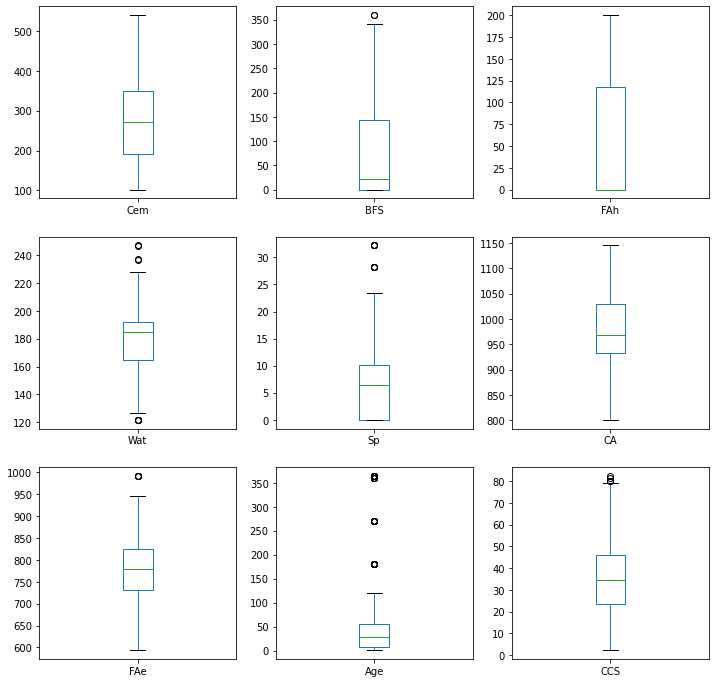

In [ ]:
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
data.plot(ax=ax, kind= 'box', subplots=True, layout=(3,3))
plt.show()

>Se puede observar que 5 de los 8 atributos tienen valores atípicos. Asi tambien vemos atributos con bastante sesgo como por ejemplo Sp, FAh y BFS.

<a id="section311"></a>
### <font color="#55CCAF"> Histograma</font>
>Creamos histogramas para tener una idea de la distribución.

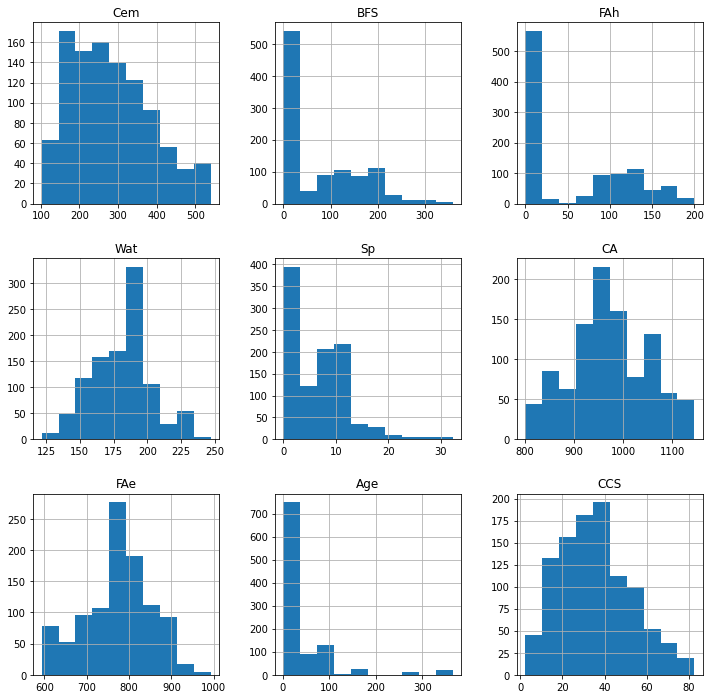

In [ ]:
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
data.hist(ax=ax)
plt.show()

>Se puede observar que solo CA, FAe y Wat tienen una distribucion cercana a la gaussiana, las demas tienen un sesgo evidente.

<a id="section311"></a>
### <font color="#55CCAF"> Diagrama de densidad</font>
>Se utiliza gráficos de densidad para visualizar la distribución.

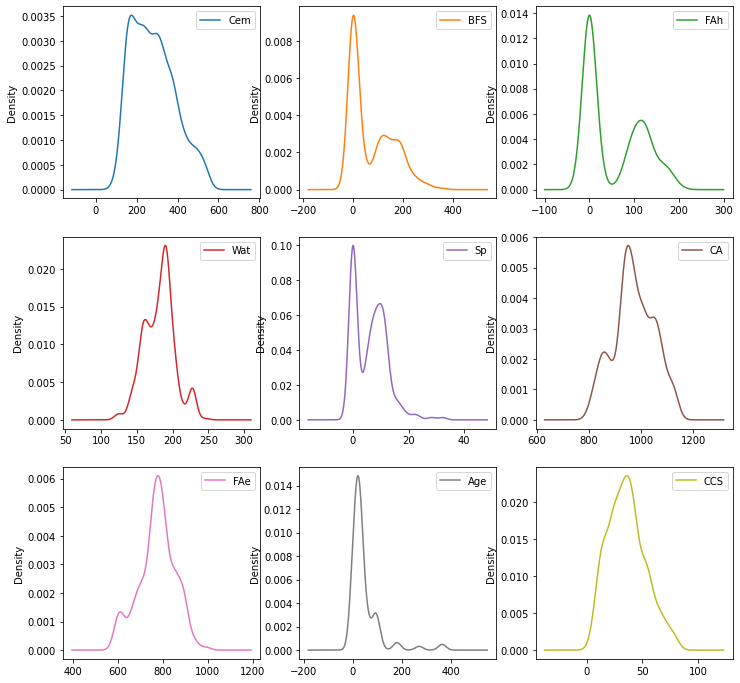

In [ ]:
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
data.plot(ax=ax, kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

>Se confirma que CA, FAe y Wat tienen una distribucion cercana a la gaussiana, las demas tienen un sesgo que se puede intentar corregir con una transformacion Box-Cox.

<a id="section32"></a>
## <font color="#55CCAF"> 3.2. Gráficos multivariados</font>

<a id="section321"></a>
### <font color="#55CCAF"> Diagramas de dispersión</font>
>Mostramos las interacciones entre variables para buscar relaciones estructurales entre ellos.

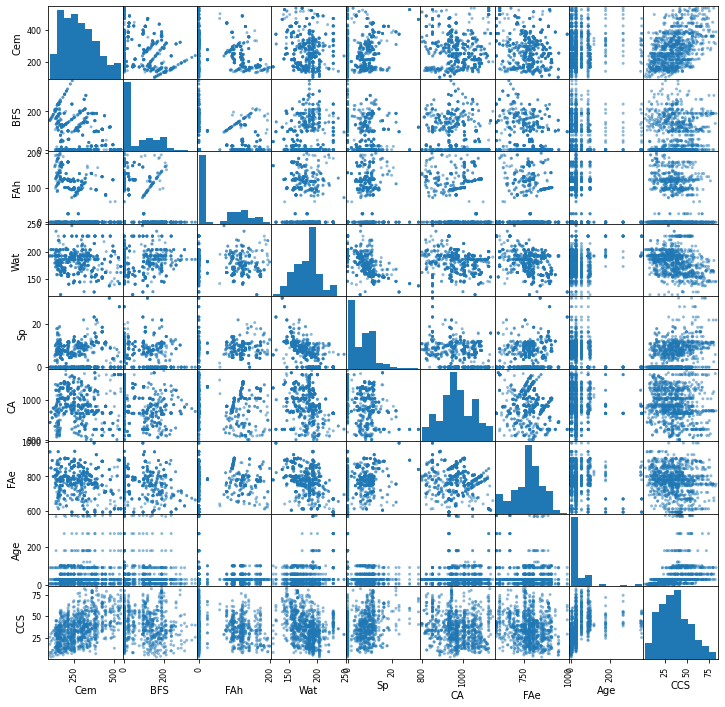

In [ ]:
plt.rcParams["figure.figsize"] = [12,12]
pd.plotting.scatter_matrix(data)
plt.show()

[]

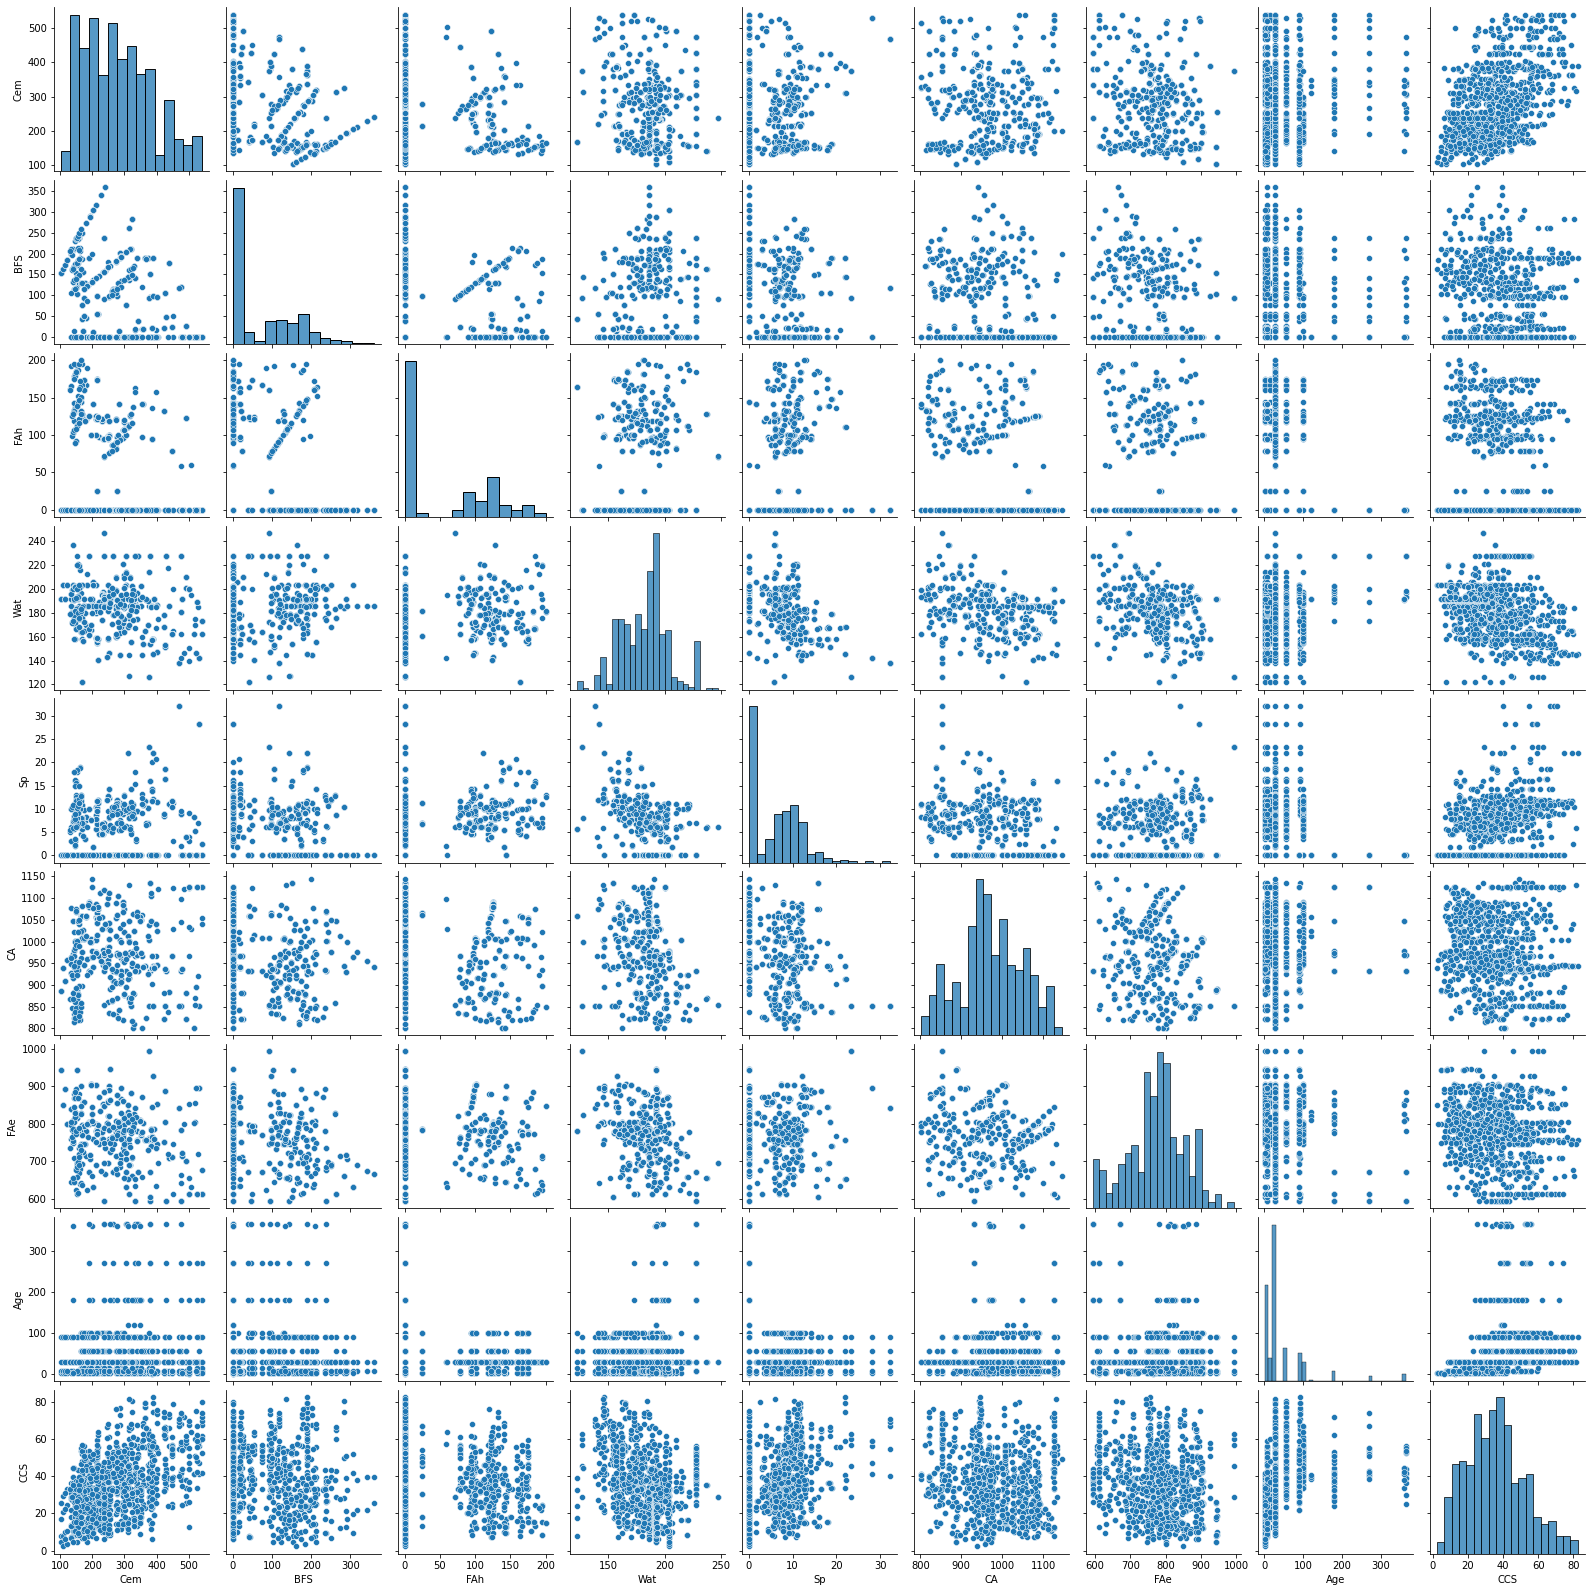

In [ ]:
plt.rcParams["figure.figsize"] = [12,12]
sns.pairplot(data)
plt.plot()

>Se puede observar entre atributos que hay ciertas linealidades en parte de los datos, pero no en todos, la mayoria no se muestra relacion evidente alguna. Entre el atributo Cem y CCS se puede observar cierta linealidad, no asi con el resto de valores. En Age y CCS se puede ver un patron no lineal.

<a id="section321"></a>
### <font color="#55CCAF"> Correlación entre atributos</font>
Parece que también hay alguna estructura en el orden de los atributos. El amarilo sugiere una correlación positiva mientras que el azul oscuro una coorelación negativa.

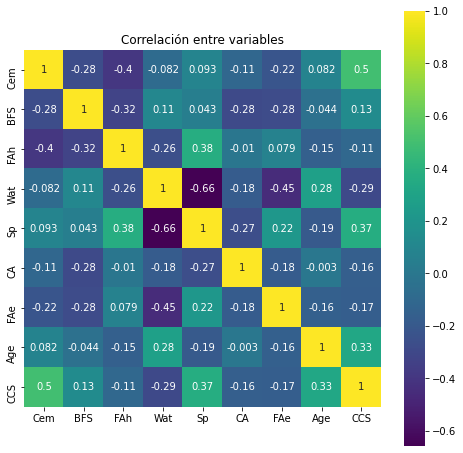

In [ ]:
correlation = data.corr()
plt.figure(figsize=(8,8))
ax = sns.heatmap(correlation, vmax=1, square=True, annot = True, cmap = 'viridis')

plt.title('Correlación entre variables')
plt.show()

>Se puede ver que solo 2 atributos tienen una correlacion relativamente alta, que son Sp y wat, sin embargo no superan el umbral de 0.7, por lo que no se puede eliminar usando este criterio. Con respecto a la clase solo Cem muestra una correlación media de 0.5, las demás porbablemente tengan una relacion no lineal.

<a id="section33"></a>
## <font color="#55CCAF"> 3.3. Resumen de ideas</font>

De acuerdo a lo visto:
* No hay datos altamente correlacionados que requieran eliminarse.
* Las diferentes graficas muestran sesgos grandes en los atributos, por lo que puede aplicar una transformacion de correcccion como Box-Cox.
* Los diferentes rangos de valores y sesgos que toman los atributos sugieren que se deberia estandarizar el conjunto de datos.

<a id="section4"></a>
# <font color="#55CCAF"> 4. Fase de modelado</font>

Se procederá a:
* Crear conjunto de validación.
* Evaluación de línea base.
* Evaluar algoritmos: Box-Cox y Estandarización.

<a id="section41"></a>
## <font color="#55CCAF"> 4.1. Crear conjunto de validación</font>

>Se dividirá el data en un conjunto de entrenamiento y en uno de validacion con el cual se realizara las pruebas de rendimiento.

In [ ]:
atributos = data.values[:,0:8]
target = data.values[:,8]

test_size = 0.20
seed = 8

X_train, X_test, y_train, y_test = train_test_split(atributos,
                                                            target,
                                                            test_size=test_size,
                                                            random_state=seed)

>Ahora se usará el conjunto X_train para entrenamiento y X_test para la validacion.

<a id="section42"></a>
## <font color="#55CCAF"> 4.2. Evaluación de línea base</font>

> Se utilizará la metrica r2 para la evaluacion de los modelos de regresion que se usarán siendo 1 un ajuste perfecto. Se probarán tanto algoritmos lineales como son:  LiR, LASSO y EN, asi como algoritmos no lineales como son: CART, SVM y $k$-NN. Se utilizará pipelines para probar los algoritmos, los cuales se trabajarán con parámetros por defecto. Los resultados que se obtengan serviran como linea base del rendimiento.

In [ ]:
# Test options and evaluation metric
num_folds = 10
scoring = 'r2'

# Spot Check Algorithms
models = []
models.append(('LiR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('k-NN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

>Como se aprecia se tiene la lista de algoritmos a usar, por lo que se procede a la evaluación mediante validación cruzada. Se mostrará los la media de los resultados asi como su desviacion estandar.

In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():,.3f} ({cv_results.std():,.3f})")

LiR: 0.614 (0.069)
LASSO: 0.614 (0.068)
EN: 0.614 (0.068)
k-NN: 0.670 (0.100)
CART: 0.796 (0.095)
SVM: 0.246 (0.037)


>Como se aprecia los algoritmos no lineales fueron los que mejor rendimiento tuvieron. Se procede a plotear para una mejor interpretacion de los resultados.

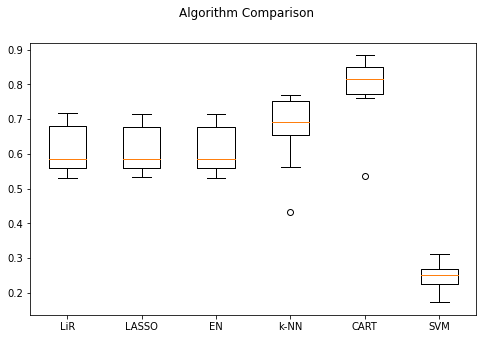

In [ ]:
# Compare Algorithms
fig = plt.figure(figsize=(8,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

> Las escalas diferentes y los sesgos de los atributos influyen en los resultados, por lo que se utilizara una correccion del sesgo asi como una estandarizacion.

<a id="section43"></a>
## <font color="#55CCAF"> 4.3. Evaluar modelos: Box-Cox + Estandarización</font>

>Se aplicará una transformacion de Box-Cox a todos los atributos que cumplan los requisitos (valores mayores que 0), es decir a todos menos a BFS, FAh, Sp, esto para corregir los sesgos. Luego de corregido los sesgos se estandarizará todos los atributos.

In [ ]:
atrib_bc, atrib_n_bc = [0,3,5,6,7],[1,2,4] #Atributos a transformar

>Se aplica Box-Cox a las columnas especificadas en `atrib_bc` y un estandar escaler a las columnas en `atrib_n_bc`

In [ ]:
transf = [          ("Standardize", StandardScaler(), atrib_n_bc)]

col_transform = ColumnTransformer(transformers=transf,
                                  remainder="passthrough")

>Se crea la lista de pipelines con el preprocesamiento y modelos a evaluar.

In [ ]:
pipelines = []
pipelines.append(('LiR', make_pipeline(col_transform, LinearRegression())))
pipelines.append(('LASSO', make_pipeline(col_transform, Lasso())))
pipelines.append(('EN', make_pipeline(col_transform, ElasticNet())))
pipelines.append(('k-NN', make_pipeline(col_transform, KNeighborsRegressor())))
pipelines.append(('CART', make_pipeline(col_transform, DecisionTreeRegressor())))
pipelines.append(('SVM', make_pipeline(col_transform, SVR())))

>Se comparan los modelos utilizando validacion cruzada con 10 folds.

In [ ]:
resultados = []
nombres = []

folds = 10
kfold = KFold(n_splits=folds, random_state=seed, shuffle= True)

for pipelinename, pipeline in pipelines:
    cv_resultados = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='r2')
    resultados.append(cv_resultados)
    names.append(pipelinename)
    print("{}: {:,.3f} ({:,.3f})".format(pipelinename, cv_resultados.mean(), cv_resultados.std()))

LiR: 0.808 (0.033)
LASSO: 0.765 (0.034)
EN: 0.667 (0.027)
k-NN: 0.846 (0.037)
CART: 0.845 (0.049)
SVM: 0.760 (0.024)


>Podemos ver que se obtuvo una mejora general de todos los modelos respecto a la linea base. Se aprecia que $k$-NN y CART muestran los mejores resultados, seguido de LiR, es probable que SVM aumente significativamente su rendimiento usando un kernel lineal. Procedemos a hacer un gráfico Boxplot para un mejor entendimiento de los resultados.

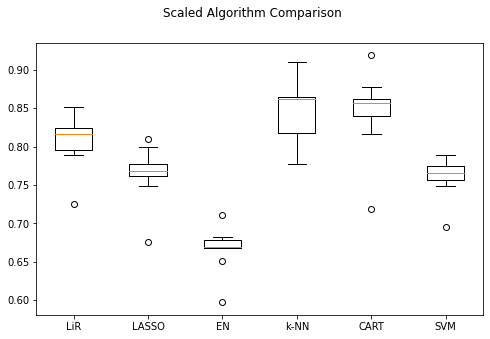

In [ ]:
# Compare Algorithms
fig = plt.figure(figsize=(8,5))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(names)
plt.show()

>Se puede apreciar que $k$-NN tiene la media de rendimiento mayor, sin embargo, tiene una desviacion estandar un tanto mas amplia que CART, cuya media de rendimiento es parecida. Aun así se tomara KNN como el modelo a optimizar, debido a que aparecen rendimientos atipicos en la grafica de CART.

<a id="section5"></a>
# <font color="#55CCAF"> 5. Fase de Optimización</font>

<a id="section51"></a>
## <font color="#55CCAF"> 5.1. Optimización de $k$-NN</font>

>Se transforma los atributos para que el procesamiento de Box-Cox y Estandarización se tome en cuenta en la optimización.

In [ ]:
X_train_transform = col_transform.fit_transform(X_train)

>Se intentará optimizar el valor de `n_neighbors` y de `weights` para lo que se usara una busqueda de grilla con la función `GridSearchCV`.

In [ ]:
n_neighbors = np.array([3,5,7,9,11])
weights = np.array(["uniform", "distance"])

param_grid = dict(n_neighbors=n_neighbors, weights=weights)

grid = GridSearchCV(estimator=KNeighborsRegressor(), scoring="r2", param_grid=param_grid, cv=10)
grid_result = grid.fit(X_train_transform, y_train)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{param}: {mean:,.2f} ({stdev:,.2f})")

Best: 0.8815859607285397 using {'n_neighbors': 5, 'weights': 'distance'}
{'n_neighbors': 3, 'weights': 'uniform'}: 0.86 (0.04)
{'n_neighbors': 3, 'weights': 'distance'}: 0.88 (0.03)
{'n_neighbors': 5, 'weights': 'uniform'}: 0.85 (0.04)
{'n_neighbors': 5, 'weights': 'distance'}: 0.88 (0.04)
{'n_neighbors': 7, 'weights': 'uniform'}: 0.83 (0.05)
{'n_neighbors': 7, 'weights': 'distance'}: 0.87 (0.04)
{'n_neighbors': 9, 'weights': 'uniform'}: 0.81 (0.05)
{'n_neighbors': 9, 'weights': 'distance'}: 0.86 (0.04)
{'n_neighbors': 11, 'weights': 'uniform'}: 0.81 (0.06)
{'n_neighbors': 11, 'weights': 'distance'}: 0.86 (0.04)


>Podemos observar que los mejores parámetros son `n_neighbors = 5` y `weights = 'distance'`, con lo que obtiene un r2 de 0.8815, que es una mejora significativa de 0.04 respecto al anterior.

<a id="section6"></a>
# <font color="#55CCAF"> 6. Algoritmos ensamblados</font>

>Se procederá a buscar algoritmos ensamblados que tengan mejor rendimiento que $k$-NN.

<a id="section61"></a>
## <font color="#55CCAF"> 6.1. Comparar algoritmos ensamblados</font>

>Se procederá a comparar los siguientes ensambles:
* Métodos Boosting: AdaBoost (AB) y Gradient Boosting (GBM).
* Métodos Bagging: Random Forest (RF) y Extra Trees (ET).

>Se utilizará validación cruzada de 10 y los datos transformados con Box-Cox y Estandarizacion  de `X_train_transform`. Se inicia creando la lista de ensambles a utilizar.

In [ ]:
ensembles = []
ensembles.append(('AB', make_pipeline(AdaBoostRegressor())))
ensembles.append(('GBM', make_pipeline(GradientBoostingRegressor())))
ensembles.append(('RF', make_pipeline(RandomForestRegressor())))
ensembles.append(('ET', make_pipeline(ExtraTreesRegressor())))

In [ ]:
resultados = []
nombres = []

folds = 10
kfold = KFold(n_splits=folds, random_state=seed, shuffle= True)

for ensemblename, ensemble in ensembles:
    cv_resultados = cross_val_score(ensemble, X_train_transform, y_train, cv=kfold, scoring='r2')
    resultados.append(cv_resultados)
    nombres.append(ensemblename)
    print("{}: {:,.3f} ({:,.3f})".format(ensemblename, cv_resultados.mean(), cv_resultados.std()))

AB: 0.774 (0.033)
GBM: 0.898 (0.023)
RF: 0.910 (0.019)
ET: 0.922 (0.019)


>Excepto AdaBoost (AB), los resultados de los otros ensambles son muy buenos, siendo Extra Trees (ET) quien obtuvo los mejores resultados. Teniendo un rendimiento mayor que $k$-NN en un 0.04 aproximadamente.

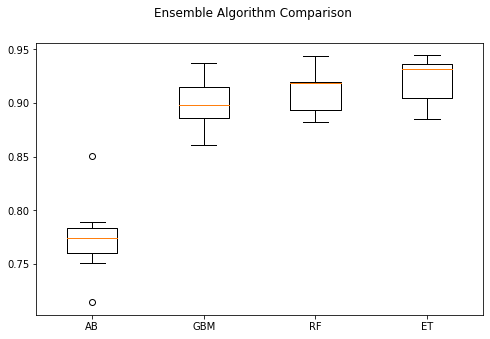

In [ ]:
fig = plt.figure(figsize=(8,5))
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nombres)
plt.show()

>Se aprecia que ET tiene la mejor media de rendimiento y una desviacion estandar estrecha, por lo que se le considera el mejor modelo.

<a id="section62"></a>
## <font color="#55CCAF"> 6.2. Fase de optimización Extra Trees</font>

>Se intentara optimizar Extra Trees en sus parámetros `n_estimators` y `max_features`.

In [ ]:
n_estimators = np.array([410,430,450,480])
max_features = np.array(["auto", "sqrt", "log2"])

param_grid = dict(n_estimators=n_estimators, max_features=max_features)

grid = GridSearchCV(estimator=ExtraTreesRegressor(), scoring="r2", param_grid=param_grid, cv=kfold)

grid_result = grid.fit(X_train_transform, y_train)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{param}: {mean:,.4f} ({stdev:,.4f})")

Best: 0.9285440995031877 using {'max_features': 'log2', 'n_estimators': 410}
{'max_features': 'auto', 'n_estimators': 410}: 0.9236 (0.0198)
{'max_features': 'auto', 'n_estimators': 430}: 0.9222 (0.0193)
{'max_features': 'auto', 'n_estimators': 450}: 0.9220 (0.0195)
{'max_features': 'auto', 'n_estimators': 480}: 0.9231 (0.0194)
{'max_features': 'sqrt', 'n_estimators': 410}: 0.9224 (0.0217)
{'max_features': 'sqrt', 'n_estimators': 430}: 0.9215 (0.0212)
{'max_features': 'sqrt', 'n_estimators': 450}: 0.9218 (0.0219)
{'max_features': 'sqrt', 'n_estimators': 480}: 0.9213 (0.0213)
{'max_features': 'log2', 'n_estimators': 410}: 0.9285 (0.0206)
{'max_features': 'log2', 'n_estimators': 430}: 0.9280 (0.0208)
{'max_features': 'log2', 'n_estimators': 450}: 0.9277 (0.0196)
{'max_features': 'log2', 'n_estimators': 480}: 0.9284 (0.0200)


Como se aprecia, la mejora no es tan grande, pero se tiene un 0.006 en el aumento del rendimiento, usando `n_estimators = 410` y `max_features = 'log2'`

<a id="section7"></a>
# <font color="#55CCAF"> 7. Fase de Forecasting</font>

>En esta sección se elaborará el modelo final con Extra Trees y los parámetros optimizados. Se evaluará entonces el conjunto de test que previamente debe ser transformado con Box-Cox y estandarizado como se hizo con el conjunto de entrenamiento.

**Creacion del modelo final**

In [ ]:
model = ExtraTreesRegressor(n_estimators=410, max_features="log2")
model.fit(X_train_transform, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='log2', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=410, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

**Evaluacion del modelo final**

In [ ]:
X_test_transform = col_transform.transform(X_test) #Box-Cox + Estandarización.

In [ ]:
predictions = model.predict(X_test_transform)
print(r2_score(y_test, predictions))

0.9218648201389195


>Se aprecia que el valor es muy cercano al obtenido en el entrenamiento, por lo cual se puede decir que el modelo final no tiene oberfiting.

**Guardando el modelo**

> Se utilizará Pickle:

In [ ]:
filename = 'final_model.pkl'
pkl.dump(model, open( filename ,'wb'))

>Comprobamos cargando el modelo

In [ ]:
loaded_model = pkl.load(open(filename, "rb"))
predicciones = loaded_model.predict(X_test_transform)
print(f" R2:{r2_score(y_test, predicciones):,.4f}")

 R2:0.9219


>Se aprecia que se ha cargado el modelo y proporciona los mismos resultados, por lo que es correcto.

**Graficando resultados**

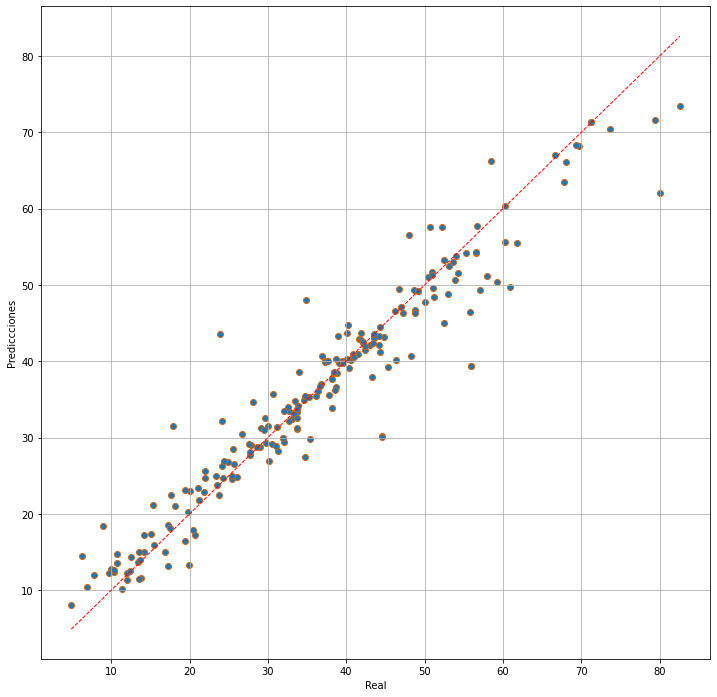

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, predicciones, edgecolors=(0.8, 0.4, 0.1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1)
ax.set_xlabel('Real')
ax.set_ylabel('Prediccciones')
ax.grid(True)

plt.show()

>Se aprecia que el modelo final predice los datos del conjunto de test bastante bien. El r2 de 0.92 indica un buen rendimiento.